In [0]:
#Importa o google drive para dentro do colab -- Bom para poder rodar sem precisar montar a cada acesso
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
notas_turma = pd.read_csv("/content/drive/My Drive/PROJ/dados/notas_turma - final.csv")
print(notas_turma)
#notas_turmas

   Curso   Alunos   AP1   AP2   AP3  Nota Conceito
0    ADM     João   9.0   8.0   9.0   8.6        B
1    ADM    Maria   6.0   4.0  10.0   6.0        D
2    DIR     José   4.0   3.0   4.0   3.6        F
3    ADM    Pedro   8.0  10.0   7.0   8.6        B
4    ECO    Paulo   7.5   8.0   9.5   8.1        B
5    DIR   Esther   6.0   4.5   6.0   5.4        D
6    ADM  Gabriel   8.0   6.0   8.0   7.2        B
7    DIR   Rafael   7.5  10.0   9.5   8.9        B
8    ECO     Davi   6.0  10.0   7.0   7.8        B
9    DIR   Silvio  10.0   9.5   9.5   9.7        A
10   ADM    Sofia   8.0   7.0   6.0   7.2        B
11   ADM   Raquel   4.5   4.0   4.0   4.2        F


In [0]:
notas_turma['Conceito']
#notas_turma.Conceito

0     B
1     D
2     F
3     B
4     B
5     D
6     B
7     B
8     B
9     A
10    B
11    F
Name: Conceito, dtype: object

In [0]:
#Faz o 'pivot' mostrando a qte de notas por conceito
notas_por_concceito = notas_turma['Conceito'].value_counts()
notas_por_concceito

B    7
D    2
F    2
A    1
Name: Conceito, dtype: int64

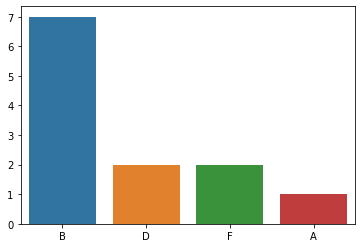

In [0]:
sns.barplot(notas_por_concceito.index, notas_por_concceito.values)

In [0]:
import pandas as pd
classes = [0,5,7,8,10]
rotulos = ['F' , 'D' , 'B' , 'A']

nts_conc = pd.value_counts( pd.cut ( x = notas_turma['Nota'] , bins = classes, labels = rotulos) )
nts_conc

A    5
B    3
D    2
F    2
Name: Nota, dtype: int64

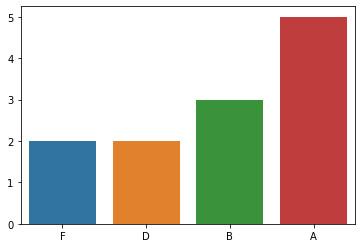

In [0]:
sns.barplot (nts_conc.index , nts_conc.values)

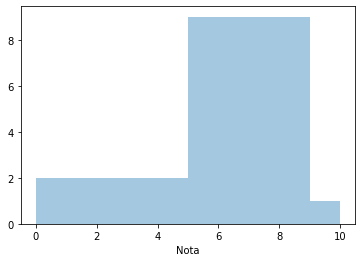

In [0]:
sns.distplot(notas_turma['Nota'], bins = [0,5,9,10], kde=False)

In [0]:
notas_turma['Nota'].describe()

count    12.000000
mean      7.108333
std       1.925172
min       3.600000
25%       5.850000
50%       7.500000
75%       8.600000
max       9.700000
Name: Nota, dtype: float64

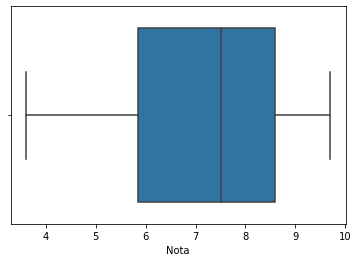

In [0]:
sns.boxplot(x='Nota', data=notas_turma)

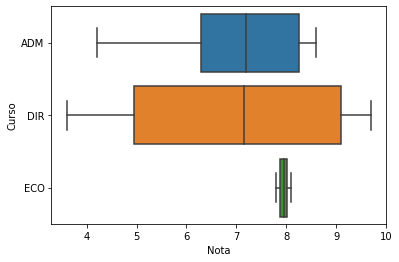

In [0]:
sns.boxplot( x='Nota' , y = 'Curso' , data = notas_turma)

In [0]:
nota_final = notas_turma['AP1'] * 0.4 + notas_turma['AP2'] * 0.4 + notas_turma['AP3'] * 0.2
nota_final

0     8.6
1     6.0
2     3.6
3     8.6
4     8.1
5     5.4
6     7.2
7     8.9
8     7.8
9     9.7
10    7.2
11    4.2
dtype: float64

In [0]:
##### Agrupa uma coluna da tabela aplicando fórmula. EX Excel Pivotable
# media_notas_por_curso = notas_turmas.groupby('Curso').mean()['Nota']
# print(media_notas_por_curso)

# Método 2
media_notas_por_curso1 = pd.crosstab(notas_turma.Curso, 'MEDIA', aggfunc = 'mean', values=notas_turma.Nota)
print(media_notas_por_curso1)

col_0     MEDIA
Curso          
ADM    6.966667
DIR    6.900000
ECO    7.950000


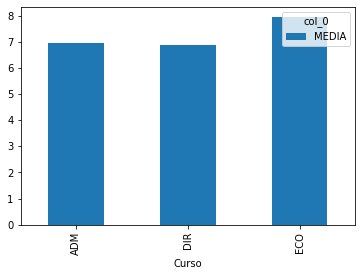

In [0]:
media_notas_por_curso1.plot.bar()

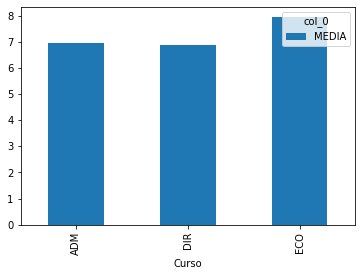

In [0]:
media_notas_por_curso1.plot(kind='bar')

In [0]:
# Importa biblioteca matplotlib
import matplotlib.pyplot as plt


In [0]:
# Importa seaborn
import seaborn as sns


In [0]:
#EXERCICIO
pedidos = pd.read_csv("/content/drive/My Drive/PROJ/dados/pedidos - qtd.csv")
print(pedidos)


         Produto   Depto  Quantidade
0       Papel A4     ADM           3
1         Grampo     ADM           2
2          Lápis  VENDAS           3
3    Caneta Azul      RH          10
4    Cartucho HP      RH           1
5         Grampo      RH           4
6    Cola bastão     ADM           2
7          Lápis  VENDAS           3
8    Cartucho HP     ADM           2
9   Caneta Preta  VENDAS           4
10   Cola bastão  VENDAS           3
11      Papel A4  VENDAS          12
12  Caneta Preta      RH           1
13         Clips     ADM           2
14         Lápis      RH          10
15  Caneta Preta     ADM           8
16   Caneta Azul     ADM           6
17         Clips  VENDAS           2
18  Caneta Preta      RH           9
19         Lápis      RH           4
20         Clips     ADM           3


<BarContainer object of 8 artists>

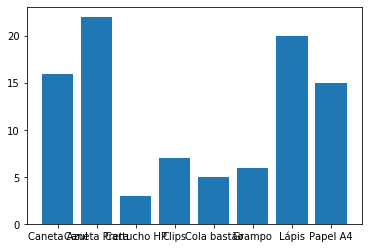

In [0]:
qtde_total = pedidos.groupby('Produto').sum()['Quantidade']
#print(qtde_total)
#sns.barplot(x=qtde_total.index, y=qtde_total.values)
plt.bar(qtde_total.index,qtde_total.values)

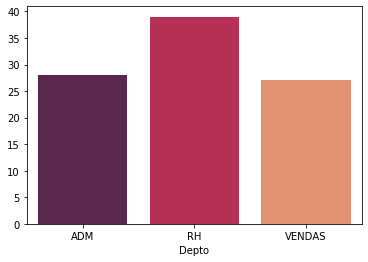

In [0]:
#Agrupa os departamentos por Quantidade == Como fosse um Pivotable
qtde_total_depto = pedidos.groupby('Depto').sum()['Quantidade']
#print(qtde_total_depto)
sns.barplot(x=qtde_total_depto.index, y=qtde_total_depto.values, palette="rocket")
 

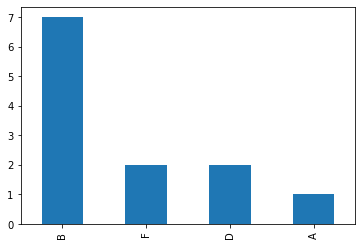

In [0]:
#Plotar notas da turma por conceito
notas_por_conceito = notas_turma['Conceito'].value_counts()
notas_por_conceito.plot.bar()


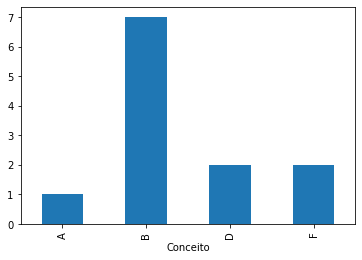

In [0]:
#Plotar notas da turma por conceito  == Outro método
notas_por_conceito1 = notas_turma.groupby('Conceito').count()['Nota']
notas_por_conceito1.plot.bar()

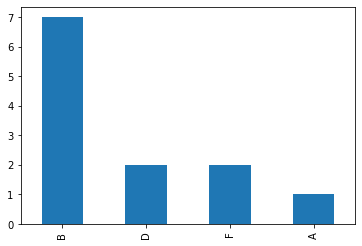

In [0]:
classes = [0,5,7,9,10]
labels = ['F', 'D', 'B', 'A']
conceitos_freq = pd.value_counts(
    pd.cut(x = notas_turma.Nota,
           bins = classes,
           labels = labels,
           include_lowest = True)
)
conceitos_freq.plot.bar()

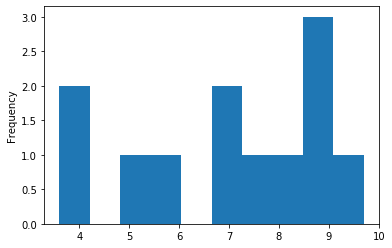

In [0]:
notas_turma.Nota.plot(kind='hist')

(array([2., 2., 7., 1.]),
 array([ 0,  5,  7,  9, 10]),
 <a list of 4 Patch objects>)

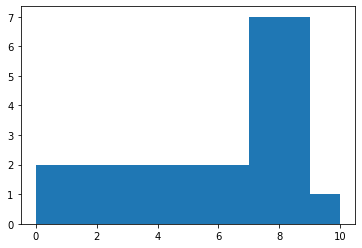

In [0]:
plt.hist(notas_turma.Nota, bins=[0,5,7,9,10])


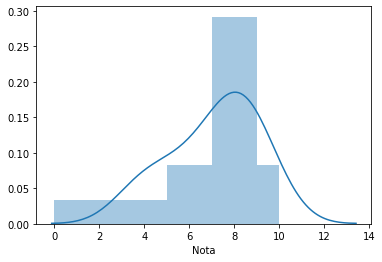

In [0]:
sns.distplot(notas_turma.Nota,bins=[0,5,7,9,10])

count    12.000000
mean      7.108333
std       1.925172
min       3.600000
25%       5.850000
50%       7.500000
75%       8.600000
max       9.700000
Name: Nota, dtype: float64

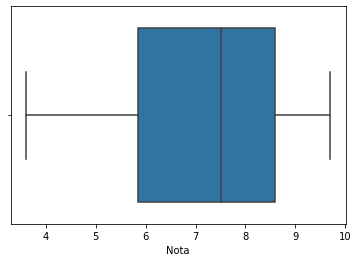

In [0]:
sns.boxplot(x = 'Nota', data = notas_turma, orient = 'h'),
notas_turma['Nota'].describe()

# EXERCÍCIO AULA 1 - Estatística [altura - masc.csv] *** HISTOGRAMA - QUARTIS - BOXPLOT

In [0]:
# Carregando o CSV
altura = pd.read_csv("/content/drive/My Drive/PROJ/dados/altura - masc.csv")
print(altura)

    altura_masc
0           187
1           157
2           172
3           181
4           179
5           157
6           172
7           183
8           153
9           169
10          179
11          179
12          152
13          166
14          178
15          185
16          150
17          165
18          176
19          189
20          175
21          161
22          175
23          184
24          186
25          188
26          152
27          167
28          179
29          179
30          145
31          164
32          175
33          185
34          175
35          162


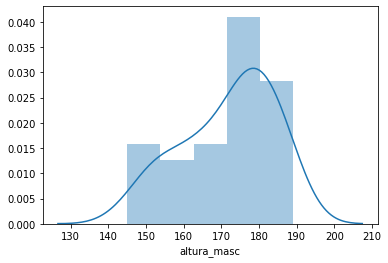

In [0]:
# Apresentando o histograma
sns.distplot(altura['altura_masc'])


In [0]:
# Calculando os Quartis
altura['altura_masc'].describe()

count     36.000000
mean     171.694444
std       12.197938
min      145.000000
25%      163.500000
50%      175.000000
75%      179.500000
max      189.000000
Name: altura_masc, dtype: float64

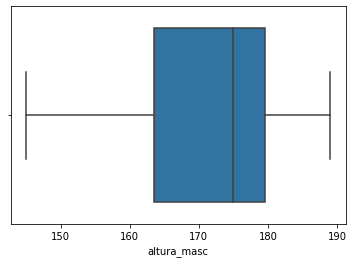

In [0]:
# Apresentando o boxplot
sns.boxplot(x='altura_masc', data=altura)


# **ML: Regressão - RegLin  = SKLEARN**


In [0]:
#Importa o CSV NOTAS

nts = pd.read_csv('/content/drive/My Drive/PROJ/dados/notas - ok.csv')
print(nts)

     AP1   AP2   AP3  Final
0   10.0  10.0   9.0   9.80
1    9.0  10.0   9.0   9.40
2    9.5  10.0  10.0   9.80
3    9.4   9.9   9.9   9.70
4    9.3   9.8   9.8   9.60
5    9.2   9.7   9.7   9.50
6    9.1   9.6   9.6   9.40
7    9.0   9.5   9.5   9.30
8   10.0   7.0   5.0   7.80
9    9.0   6.0   4.0   6.80
10   9.5   6.5   4.5   7.30
11   9.4   6.4   4.4   7.20
12   9.3   6.3   4.3   7.10
13   9.2   6.2   4.2   7.00
14   9.1   6.1   4.1   6.90
15   9.0   6.0   4.0   6.80
16   5.2   5.2   4.2   5.00
17   5.1   5.1   4.1   4.90
18   5.0   5.0   4.0   4.80
19   4.9   4.9   3.9   4.70
20   4.8   4.8   3.8   4.60
21   4.7   4.7   3.7   4.50
22   4.6   4.6   3.6   4.40
23   4.5   4.5   3.5   4.30
24   4.0   4.0   4.0   4.00
25   5.0   5.0   5.0   5.00
26   4.5   4.5   4.5   4.50
27   5.5   5.5   5.5   5.50
28   5.0   9.0  10.0   7.60
29   5.1   9.5  10.0   7.84
30   5.2   9.5  10.0   7.88
31   5.3   9.5  10.0   7.92
32   5.4   9.5  10.0   7.96
33   5.5   9.5  10.0   8.00
34   4.9   9.0  10.0

In [0]:
from sklearn.linear_model import LinearRegression #importa o sklearn
regLin = LinearRegression() 
regLin.fit(nts[['AP1', 'AP2']], nts['AP3']) #2 colunas de um vetor, usa colchetes duplos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(regLin.coef_,regLin.intercept_) # Primeiro coef, Segundo coef, Intercept

[-0.36608176  1.38338992] -0.8257714929014783


In [0]:
#Criando a função do zero
def prever_ap3(ap1, ap2):
  return ap1 * -0.366 + ap2 * 1.383 - 0.825

#Prevê a nota de acordo com as 2 notas tiradas
print(prever_ap3(8,8)) 
print(prever_ap3(2,4))
print(prever_ap3(3.5,8))

7.310999999999999
3.9749999999999996
8.958


In [0]:
#Usando a previsão de forma mais prática, sem ser do zero.
nts_futuras = pd.DataFrame({'AP1': [8, 2, 3.5], # Olhas as notas como se fosse em coluna (8 e 8 , 2 e 4 , 3.5 e 8)
                            'AP2': [8, 4, 8]})
regLin.predict(nts_futuras)

array([7.31269382, 3.97562468, 8.96006172])

In [0]:
r2 = regLin.score(nts[['AP1', 'AP2']], nts['AP3'])
r2

0.9818896713333346

In [0]:
ap3_prev = regLin.predict(nts[['AP1','AP2']])

from sklearn import metrics # Usado para capturar cada métrica
rr = metrics.r2_score(nts['AP3'], ap3_prev)
rr

0.9818896713333346

In [0]:
err_quad = metrics.mean_squared_error(nts['AP3'] , ap3_prev)
err_quad

0.14550924670519017

In [0]:
import numpy as np
err = np.sqrt(err_quad)
err

0.38145674290172166

In [0]:
import statsmodels.api as sm #biblioteca mais completa
nts[['AP1', 'AP2']]

In [0]:
ap1_ap2 = sm.add_constant(nts[['AP1', 'AP2']])
ap1_ap2

In [0]:
r1 = sm.OLS(nts['AP3'], ap1_ap2).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AP3   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1003.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.91e-33
Time:                        00:17:24   Log-Likelihood:                -18.207
No. Observations:                  40   AIC:                             42.41
Df Residuals:                      37   BIC:                             47.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8258      0.265     -3.111      0.004      -1.364      -0.288
AP1           -0.3661      0.030    -12.318      0.000      -0.426      -0.306
AP2            1.3834      0.031     44.788      0.000       1.321       1.446
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.534
Skew:                           0.642   Prob(JB):                        0.171
Kurtosis:                       2.314   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

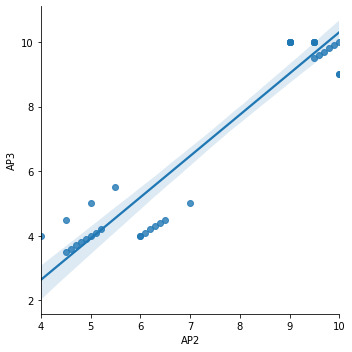

In [0]:
sns.lmplot('AP2' , 'AP3' , data=nts) # Plota o valor da predição de AP3 conforme AP 2 fornecida

In [0]:
# Exibe a correlação
nts.corr() 

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


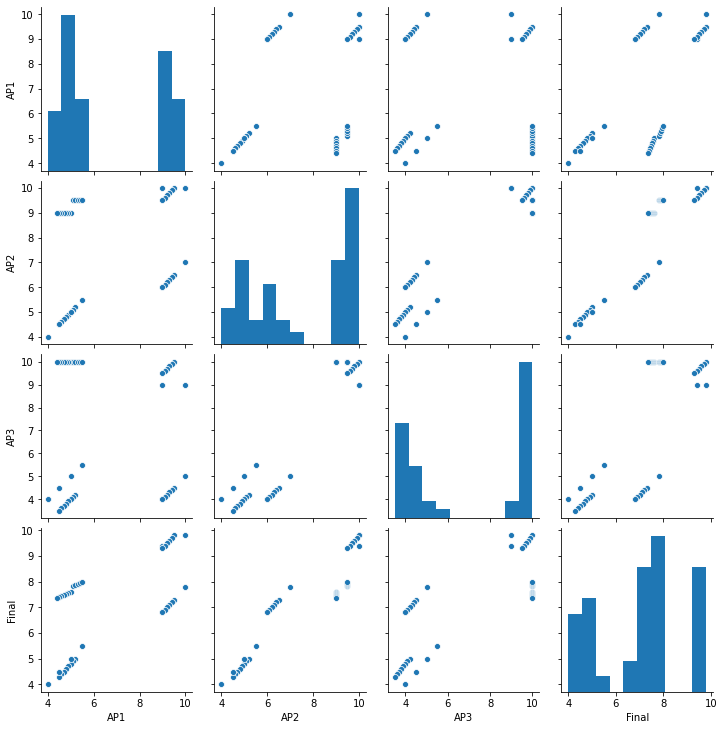

In [0]:
# Plota os dados de cada AP
sns.pairplot(nts)

# ** EXERCíCIO AULA 2 - Regressão Linear**

In [0]:
bovxusd = pd.read_csv('/content/drive/My Drive/PROJ/dados/bovxusd - 18-19.csv')
print(bovxusd)

          volume  negocios     USD     bov
0    15308341794   1621519  3.8961  95.416
1    17476881638   1880638  3.9676  94.389
2    17944248009   2063278  3.9383  91.903
3    15364759360   1566938  3.8640  95.307
4    14641225846   1585718  3.8764  93.662
..           ...       ...     ...     ...
236   8847350347   1042029  3.3852  85.444
237  10009143889   1073048  3.4046  85.246
238  11333605403   1182342  3.4189  84.510
239   9225958730   1125871  3.3897  83.307
240   9680191051   1071673  3.3660  84.820

[241 rows x 4 columns]


In [0]:
# Exibe a correlação
bovxusd.corr() 

,volume,negocios,USD,bov
volume,1.000000,0.786052,-0.165195,0.452319
negocios,0.786052,1.000000,-0.123922,0.430203
USD,-0.165195,-0.123922,1.000000,-0.282083
bov,0.452319,0.430203,-0.282083,1.000000


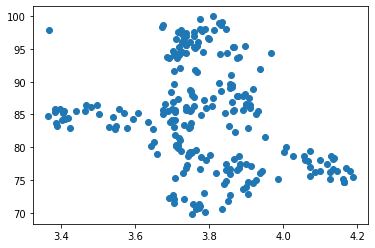

In [0]:
plt.scatter(bovxusd.USD , bovxusd.bov)

In [0]:
nts_futuras = pd.DataFrame({​'AP1'​:[​8​,​2​,​3.5​]​}) reglin.predict(nts_futuras)

SyntaxError: ignored